In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(library("scales")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


In [2]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_global")
fname = "result.rank_diff.tsv"
fpath = file.path(fdiry, fname)
dat = read_tsv(fpath, show_col_types = FALSE)
dat_rank_diff = dat

print(dim(dat))
head(dat)

[1] 417  14


Peak,Region,KS91_K562_ASTARRseq,A001_K562_WSTARRseq,Tewhey_K562_TileMPRA,rank_ASTARR,rank_WSTARR,rank_TMPRA,rank_diff_ASTARR_WSTARR,rank_diff_ASTARR_TMPRA,rank_diff_WSTARR_TMPRA,z_diff_ASTARR_WSTARR,z_diff_ASTARR_TMPRA,z_diff_WSTARR_TMPRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61554569_61556228,FADS,-0.89731811,-0.157723497,-0.15339793,4,4,8,0,-4,-4,0.00000000,-0.06980891,-0.07729038
chr11_61560645_61561556,FADS,-0.33300518,0.042626535,-0.44589478,10,13,4,-3,6,9,-0.05181686,0.10471337,0.17390337
chr11_61567108_61567997,FADS,-0.03523130,-0.097785489,0.23849061,15,7,15,8,0,-8,0.13817830,0.00000000,-0.15458077
chr11_61580592_61581826,FADS,-0.56224848,-0.004937959,1.98128430,8,12,20,-4,-12,-8,-0.06908915,-0.20942674,-0.15458077
chr11_61587170_61588742,FADS,-0.93990159,0.240565387,0.09901037,3,19,14,-16,-11,5,-0.27635660,-0.19197451,0.09661298
chr11_61594868_61596571,FADS,-0.03754519,0.171364579,2.30957456,14,17,22,-3,-8,-5,-0.05181686,-0.13961783,-0.09661298


In [3]:
###
fdiry = file.path(FD_RES, "results", "comparison", "comparison_local", "cor_size_200bp_step_50bp", "summary")
fname = "cor.pLog2FC.combine.summary.tsv"
fpath = file.path(fdiry, fname)

###
dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>%
    mutate(
        cor_diff_astarr_wstarr = (1 - cor_astarr_wstarr_mu) / 2,
        cor_diff_astarr_tmpra  = (1 - cor_astarr_tmpra_mu)  / 2,
        cor_diff_wstarr_tmpra  = (1 - cor_wstarr_tmpra_mu)  / 2)

###
dat_rolling_sum = dat
print(dim(dat))
head(dat)

[1] 417  16


Peak,cor_astarr_wstarr_mu,cor_astarr_tmpra_mu,cor_wstarr_tmpra_mu,cor_astarr_wstarr_q25,cor_astarr_tmpra_q25,cor_wstarr_tmpra_q25,cor_astarr_wstarr_q50,cor_astarr_tmpra_q50,cor_wstarr_tmpra_q50,cor_astarr_wstarr_q75,cor_astarr_tmpra_q75,cor_wstarr_tmpra_q75,cor_diff_astarr_wstarr,cor_diff_astarr_tmpra,cor_diff_wstarr_tmpra
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61554569_61556228,-0.18127468,-0.21115912,-0.21716299,-0.6135967,-0.8132110,-0.8259526,-0.229850169,-0.54769216,-0.3230652,0.2317576,0.5388165,0.3159356,0.5906373,0.6055796,0.6085815
chr11_61560645_61561556,0.17339053,-0.12360605,0.10435204,-0.2166741,-0.6753074,-0.2878721,0.009281097,-0.22121697,0.3124746,0.6159998,0.3578571,0.4196466,0.4133047,0.5618030,0.4478240
chr11_61567108_61567997,0.26138151,0.25041520,0.01814805,-0.5653378,0.2297908,-0.6327766,0.680557832,0.31204459,0.0943920,0.8981547,0.6644260,0.6427077,0.3693092,0.3747924,0.4909260
chr11_61580592_61581826,0.43116637,0.08971366,-0.25060078,0.1703289,-0.6531617,-0.7737075,0.688340458,0.15231364,-0.5087642,0.8214968,0.8218343,0.1479528,0.2844168,0.4551432,0.6253004
chr11_61587170_61588742,0.14679704,-0.09365859,0.01170847,-0.3643061,-0.8069430,-0.6008330,0.334978207,-0.07165809,-0.1484564,0.6009396,0.5727815,0.7175140,0.4266015,0.5468293,0.4941458
chr11_61594868_61596571,0.01351688,-0.41569520,0.08414937,-0.3394891,-0.8390609,-0.4433223,-0.049592125,-0.69334700,0.1573338,0.4592163,-0.2696536,0.6387805,0.4932416,0.7078476,0.4579253


In [4]:
dat_comb = full_join(dat_rank_diff, dat_rolling_sum, by="Peak")
dat_comb$Label = ifelse(dat$Peak == "chrX_48782524_48783758", "1", "0")
head(dat_comb)

Peak,Region,KS91_K562_ASTARRseq,A001_K562_WSTARRseq,Tewhey_K562_TileMPRA,rank_ASTARR,rank_WSTARR,rank_TMPRA,rank_diff_ASTARR_WSTARR,rank_diff_ASTARR_TMPRA,⋯,cor_astarr_wstarr_q50,cor_astarr_tmpra_q50,cor_wstarr_tmpra_q50,cor_astarr_wstarr_q75,cor_astarr_tmpra_q75,cor_wstarr_tmpra_q75,cor_diff_astarr_wstarr,cor_diff_astarr_tmpra,cor_diff_wstarr_tmpra,Label
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr11_61554569_61556228,FADS,-0.89731811,-0.157723497,-0.15339793,4,4,8,0,-4,⋯,-0.229850169,-0.54769216,-0.3230652,0.2317576,0.5388165,0.3159356,0.5906373,0.6055796,0.6085815,0
chr11_61560645_61561556,FADS,-0.33300518,0.042626535,-0.44589478,10,13,4,-3,6,⋯,0.009281097,-0.22121697,0.3124746,0.6159998,0.3578571,0.4196466,0.4133047,0.5618030,0.4478240,0
chr11_61567108_61567997,FADS,-0.03523130,-0.097785489,0.23849061,15,7,15,8,0,⋯,0.680557832,0.31204459,0.0943920,0.8981547,0.6644260,0.6427077,0.3693092,0.3747924,0.4909260,0
chr11_61580592_61581826,FADS,-0.56224848,-0.004937959,1.98128430,8,12,20,-4,-12,⋯,0.688340458,0.15231364,-0.5087642,0.8214968,0.8218343,0.1479528,0.2844168,0.4551432,0.6253004,0
chr11_61587170_61588742,FADS,-0.93990159,0.240565387,0.09901037,3,19,14,-16,-11,⋯,0.334978207,-0.07165809,-0.1484564,0.6009396,0.5727815,0.7175140,0.4266015,0.5468293,0.4941458,0
chr11_61594868_61596571,FADS,-0.03754519,0.171364579,2.30957456,14,17,22,-3,-8,⋯,-0.049592125,-0.69334700,0.1573338,0.4592163,-0.2696536,0.6387805,0.4932416,0.7078476,0.4579253,0


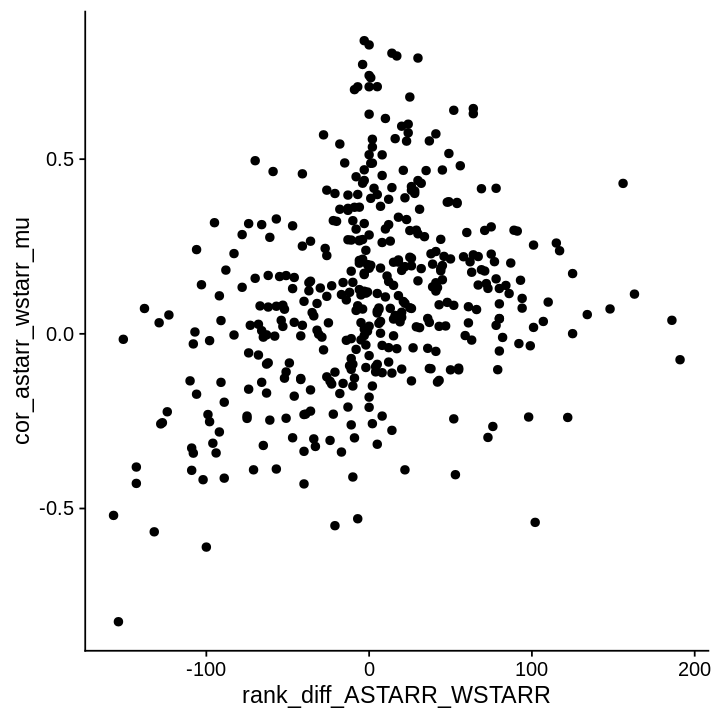

In [5]:
dat = dat_comb
gpt = ggplot(dat, aes(x=rank_diff_ASTARR_WSTARR, y=cor_astarr_wstarr_mu)) + 
    geom_point(size=2) + 
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=6)
print(gpt)

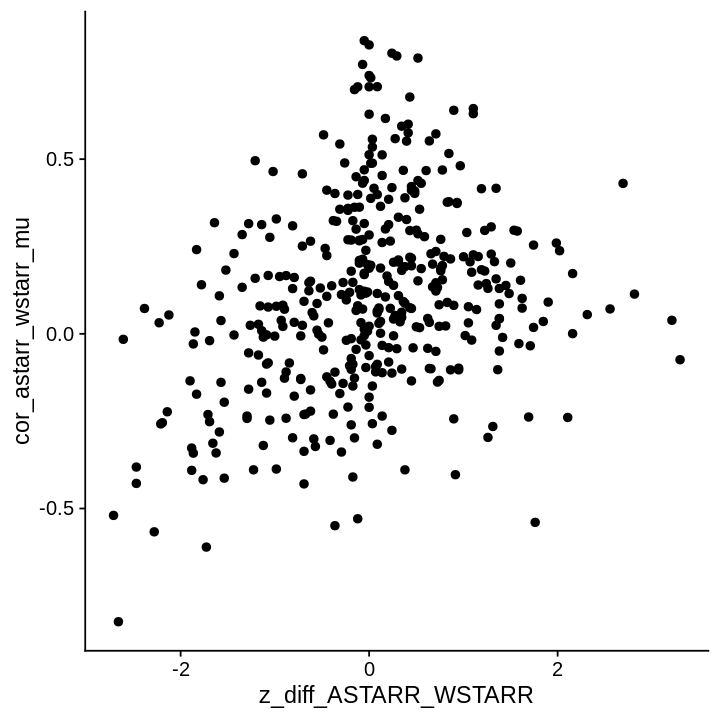

In [6]:
dat = dat_comb
gpt = ggplot(dat, aes(x=z_diff_ASTARR_WSTARR, y=cor_astarr_wstarr_mu)) + 
    geom_point(size=2) + 
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=6)
print(gpt)

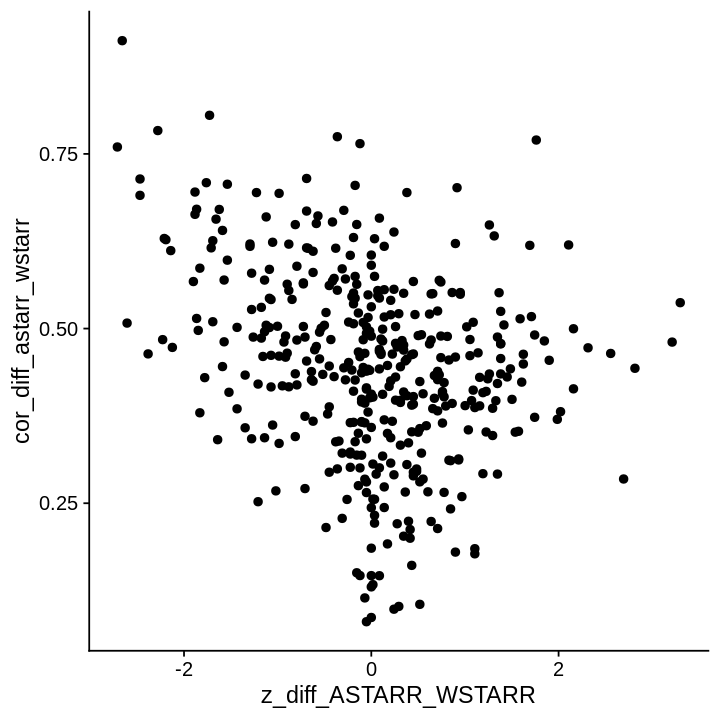

In [7]:
dat = dat_comb
gpt = ggplot(dat, aes(x=z_diff_ASTARR_WSTARR, y=cor_diff_astarr_wstarr)) + 
    geom_point(size=2) + 
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=6)
print(gpt)

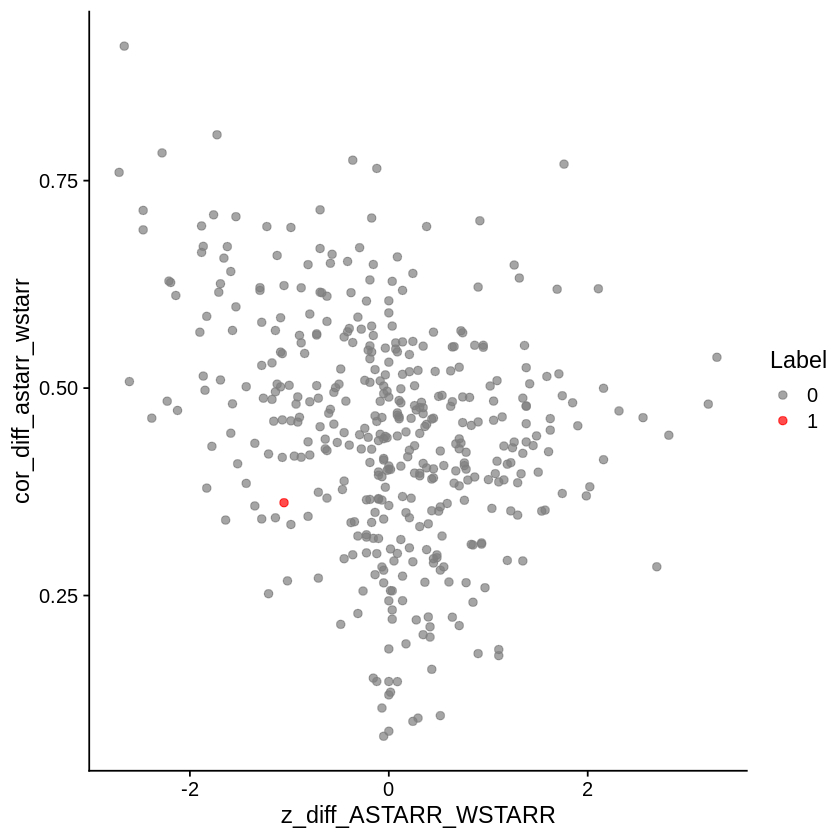

In [8]:
dat = dat_comb
gpt = ggplot(dat, aes(x=z_diff_ASTARR_WSTARR, y=cor_diff_astarr_wstarr, color=Label)) + 
    geom_point(size=2, alpha=0.7) + 
    scale_color_manual(values = c("1" = "red", "0" = "grey50")) +
    theme_cowplot()

options(repr.plot.height=7, repr.plot.width=7)
print(gpt)

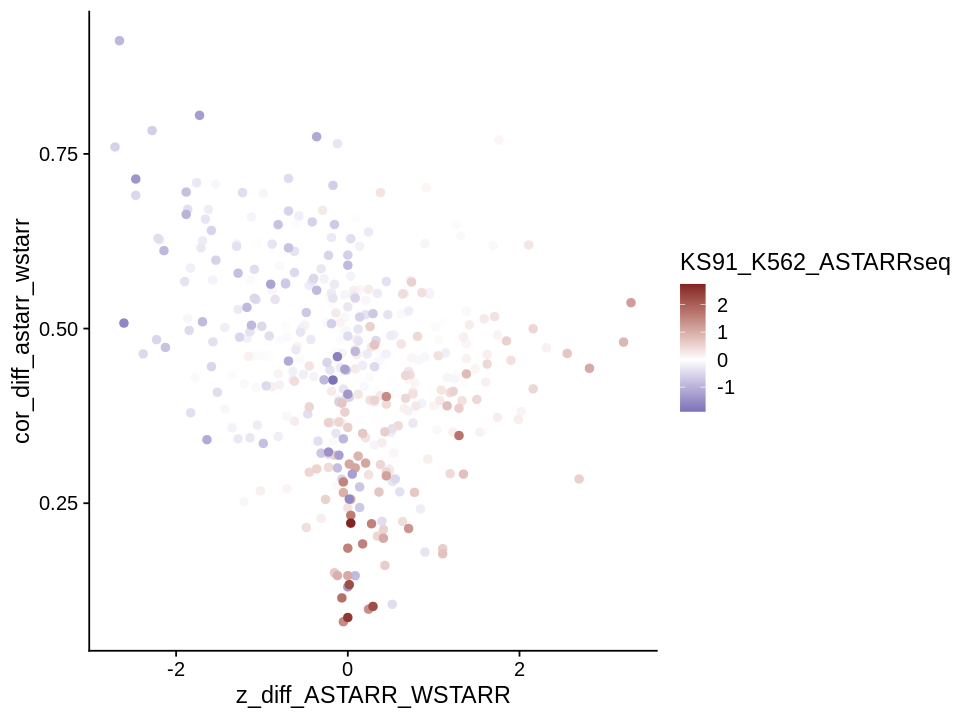

In [11]:
dat = dat_comb
dat = dat %>% arrange(abs(KS91_K562_ASTARRseq))
gpt = ggplot(dat, aes(x=z_diff_ASTARR_WSTARR, y=cor_diff_astarr_wstarr, color=KS91_K562_ASTARRseq)) + 
    geom_point(size=2) + 
    scale_color_gradient2(
        low  = muted("blue"),
        mid  = "white",
        high = muted("red")
    ) +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

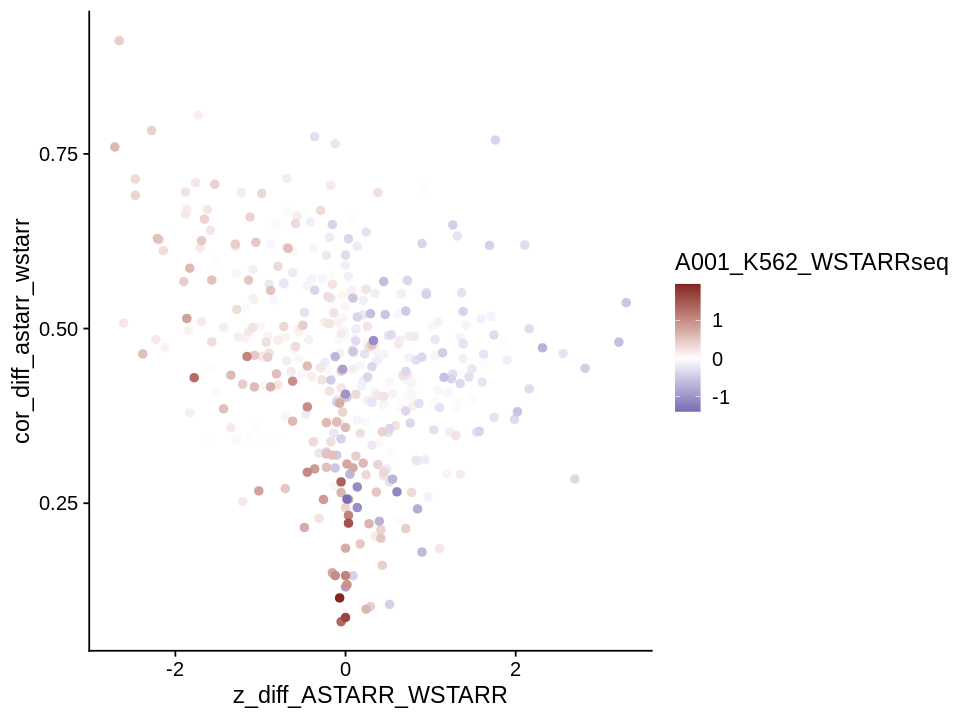

In [12]:
dat = dat_comb
dat = dat %>% arrange(abs(A001_K562_WSTARRseq))
gpt = ggplot(dat, aes(x=z_diff_ASTARR_WSTARR, y=cor_diff_astarr_wstarr, color=A001_K562_WSTARRseq)) + 
    geom_point(size=2) + 
    scale_color_gradient2(
        low  = muted("blue"),
        mid  = "white",
        high = muted("red")
    ) +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

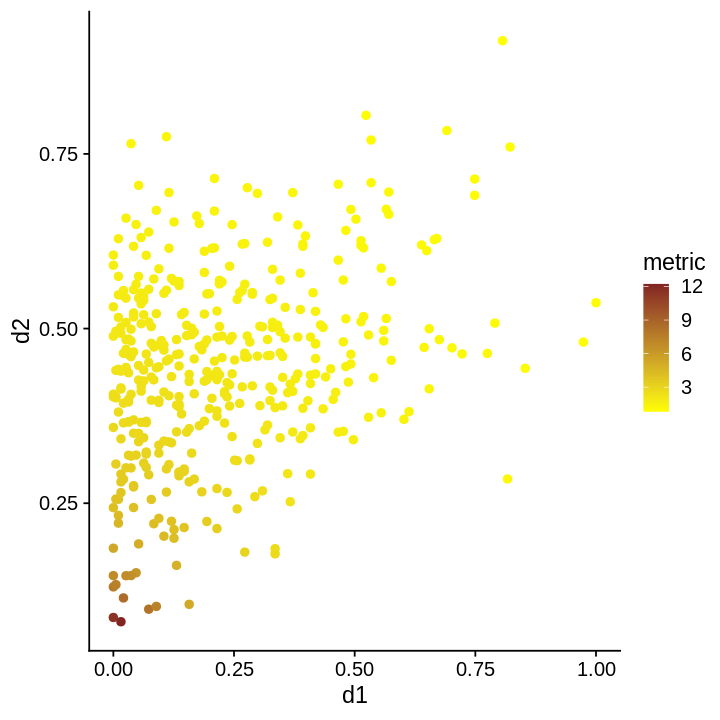

In [55]:
dat = dat_comb
dat = dat %>% mutate(
    d1 = abs(z_diff_ASTARR_WSTARR),
    d2 = cor_diff_astarr_wstarr)

dat$d1 = (dat$d1 - min(dat$d1)) / (max(dat$d1) - min(dat$d1))
dat = dat %>% mutate(metric = 1/sqrt(d1^2 + d2^2))

gpt = ggplot(dat, aes(x=d1, y=d2, color=metric)) + 
    geom_point(size=2) + 
    scale_color_gradient(
        low  = "yellow",
        high = muted("red")
    ) +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=6)
print(gpt)

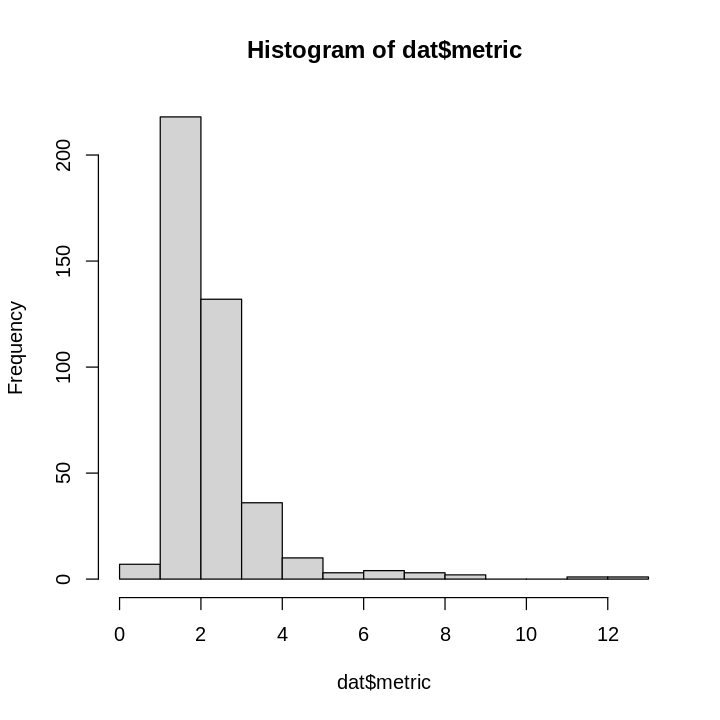

In [56]:
hist(dat$metric)

In [ ]:
gpt = ggplot(dat, aes(x=d1, y=d2, color=metric)) + 
    geom_point(size=2) + 
    scale_color_gradient2(
        low  = muted("blue"),
        mid  = "yellow",
        high = muted("red")
    ) +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=6)
print(gpt)